In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import keras
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from keras.callbacks import EarlyStopping
from keras.utils import plot_model

In [2]:
data = pd.read_csv('rfe_dataset_10.csv')

In [3]:
X = data.drop('Class', axis = 1)
y = data[['Class']]

In [4]:
# Podela podataka na trening i test set
X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size=0.2, random_state=42, stratify = y)

In [5]:
# Kreiranje neuronske mreže
model = keras.Sequential([
    keras.layers.Dense(128, input_dim=X.shape[1], activation='relu', kernel_regularizer=keras.regularizers.l2(l2=0.01)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(l2=0.01)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(16, activation='relu', kernel_regularizer=keras.regularizers.l2(l2=0.01)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation='sigmoid')
])

In [6]:
# Kompajliranje modela
model.compile(loss = keras.losses.BinaryCrossentropy(), optimizer='adam', metrics=['accuracy'])

In [7]:
callbacks = [EarlyStopping(monitor='val_loss', patience=5)]

In [8]:
# Obuka modela
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test), callbacks=callbacks)

Epoch 1/50
2/2 [==============================] - 1s 156ms/step - loss: 1.9636 - accuracy: 0.5100 - val_loss: 1.9039 - val_accuracy: 0.6923
Epoch 2/50
2/2 [==============================] - 0s 22ms/step - loss: 1.9322 - accuracy: 0.5200 - val_loss: 1.8700 - val_accuracy: 0.6923
Epoch 3/50
2/2 [==============================] - 0s 26ms/step - loss: 1.8974 - accuracy: 0.5900 - val_loss: 1.8379 - val_accuracy: 0.7308
Epoch 4/50
2/2 [==============================] - 0s 22ms/step - loss: 1.8504 - accuracy: 0.5600 - val_loss: 1.8073 - val_accuracy: 0.7692
Epoch 5/50
2/2 [==============================] - 0s 21ms/step - loss: 1.8293 - accuracy: 0.6600 - val_loss: 1.7778 - val_accuracy: 0.7692
Epoch 6/50
2/2 [==============================] - 0s 25ms/step - loss: 1.7826 - accuracy: 0.6500 - val_loss: 1.7484 - val_accuracy: 0.7692
Epoch 7/50
2/2 [==============================] - 0s 21ms/step - loss: 1.7619 - accuracy: 0.6300 - val_loss: 1.7194 - val_accuracy: 0.7692
Epoch 8/50
2/2 [==========

In [9]:
# Testiranje predikcija
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

1/1 [==============================] - 0s 15ms/step


In [10]:
threshold = 0.5
y_train_pred_binary = [1 if pred >= threshold else 0 for pred in y_train_pred]
y_test_pred_binary = [1 if pred >= threshold else 0 for pred in y_test_pred]

In [20]:
accuracy_score(y_train, y_train_pred_binary)

0.88

In [21]:
accuracy_score(y_test, y_test_pred_binary)

0.8461538461538461

In [11]:
cm_train = confusion_matrix(y_train, y_train_pred_binary)

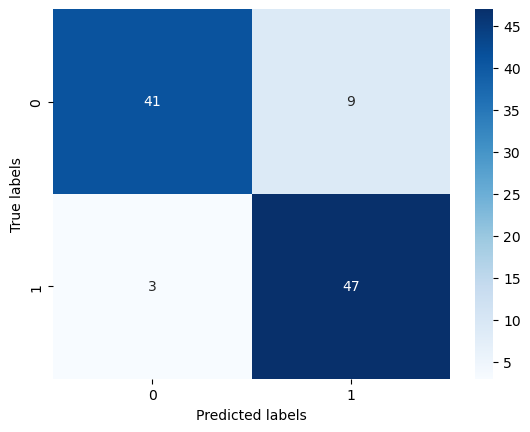

In [12]:
sns.heatmap(cm_train, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [13]:
cm_test = confusion_matrix(y_test, y_test_pred_binary)

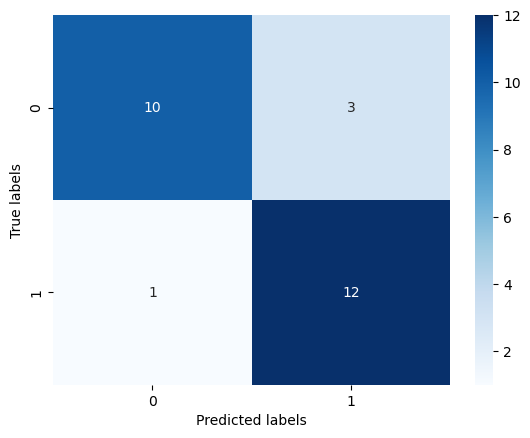

In [14]:
sns.heatmap(cm_test, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

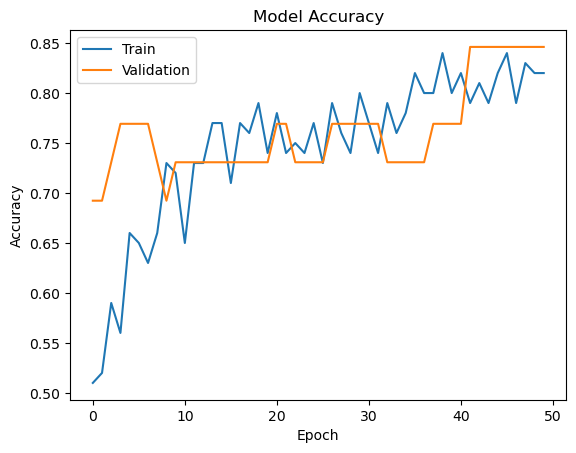

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

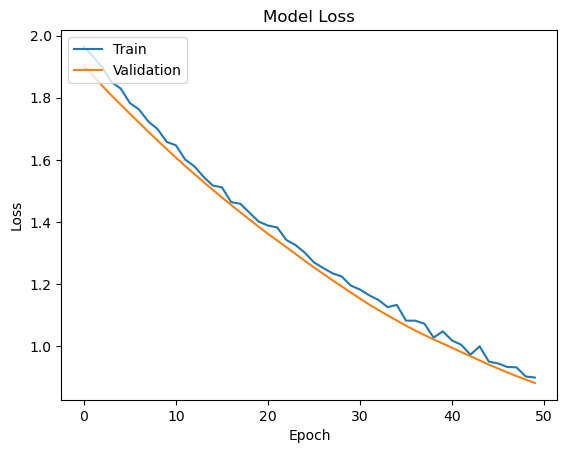

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()